In [1]:
import torch
from architectures.die_net_v2 import DieNet

model = DieNet()

model.load_state_dict(torch.load(f'../saved_weights/die_net_v2_weights.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [2]:
from utilities.dataset_tools import load_dice_dataset

train_dataset, train_dataloader = load_dice_dataset('train')
val_dataset, val_dataloader = load_dice_dataset('valid')

class_from_idx = {v: k for k, v in train_dataset.class_to_idx.items()}

In [3]:
from utilities.confusion_tools import get_confusion_matrix

train_confusion = get_confusion_matrix(model, train_dataloader)
val_confusion = get_confusion_matrix(model, val_dataloader)

In [31]:
from utilities.confusion_tools import print_overall_accuracy, print_class_accuracies

class_from_idx = {v: k for k, v in train_dataset.class_to_idx.items()}

print("Training dataset metrics:\n")
print_overall_accuracy(train_confusion)
print()
print_class_accuracies(train_confusion, class_from_idx)

print("\nValidation dataset metrics:\n")
print_overall_accuracy(val_confusion)
print()
print_class_accuracies(val_confusion, class_from_idx)

Training dataset metrics:

Overall accuracy: 79.41%

Accuracy for d10: 77.41%
Accuracy for d12: 72.97%
Accuracy for d20: 94.44%
Accuracy for d4 : 79.30%
Accuracy for d6 : 77.66%
Accuracy for d8 : 60.70%

Validation dataset metrics:

Overall accuracy: 79.40%

Accuracy for d10: 77.64%
Accuracy for d12: 73.03%
Accuracy for d20: 94.98%
Accuracy for d4 : 79.86%
Accuracy for d6 : 77.34%
Accuracy for d8 : 59.17%


In [32]:
# How do these compare with the end of Epoch 2 from the second training?

In [33]:
model2 = DieNet()
epoch = 2
model2.load_state_dict(torch.load(f'../saved_weights/die_net_v2_epoch{epoch}.pth'))

train_confusion2 = get_confusion_matrix(model2, train_dataloader)
val_confusion2 = get_confusion_matrix(model2, val_dataloader)

In [34]:
print("Training dataset metrics:\n")
print_overall_accuracy(train_confusion2)
print()
print_class_accuracies(train_confusion2, class_from_idx)

print("\nValidation dataset metrics:\n")
print_overall_accuracy(val_confusion2)
print()
print_class_accuracies(val_confusion2, class_from_idx)

Training dataset metrics:

Overall accuracy: 61.90%

Accuracy for d10: 75.32%
Accuracy for d12: 0.00%
Accuracy for d20: 92.29%
Accuracy for d4 : 0.00%
Accuracy for d6 : 74.39%
Accuracy for d8 : 94.45%

Validation dataset metrics:

Overall accuracy: 61.60%

Accuracy for d10: 74.39%
Accuracy for d12: 0.00%
Accuracy for d20: 91.63%
Accuracy for d4 : 0.00%
Accuracy for d6 : 74.22%
Accuracy for d8 : 94.50%


In [35]:
model24 = DieNet()
epoch = 24
model24.load_state_dict(torch.load(f'../saved_weights/die_net_v2_epoch{epoch}.pth'))

train_confusion24 = get_confusion_matrix(model24, train_dataloader)
val_confusion24 = get_confusion_matrix(model24, val_dataloader)

In [36]:
print("Training dataset metrics:\n")
print_overall_accuracy(train_confusion24)
print()
print_class_accuracies(train_confusion24, class_from_idx)

print("\nValidation dataset metrics:\n")
print_overall_accuracy(val_confusion24)
print()
print_class_accuracies(val_confusion24, class_from_idx)

Training dataset metrics:

Overall accuracy: 72.52%

Accuracy for d10: 91.75%
Accuracy for d12: 0.00%
Accuracy for d20: 96.89%
Accuracy for d4 : 0.00%
Accuracy for d6 : 99.75%
Accuracy for d8 : 97.98%

Validation dataset metrics:

Overall accuracy: 72.39%

Accuracy for d10: 91.06%
Accuracy for d12: 0.00%
Accuracy for d20: 96.86%
Accuracy for d4 : 0.00%
Accuracy for d6 : 99.65%
Accuracy for d8 : 97.71%


In [48]:
val_confusion24

tensor([[224.,   5.,   1.,   2.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  2.,   5., 463.,   9.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  7.,  13.,   0.,   8., 576.,   4.],
        [ 13., 218.,  14., 259.,   2., 213.]])

In [55]:
(13. + 218 + 14 + 259 + 2) / (torch.sum(val_confusion24).item() - 213.)

0.27710843373493976

In [44]:


from utilities.confusion_tools import print_class_precisions

print_class_precisions(val_confusion, class_from_idx)
print()
print_class_precisions(val_confusion2, class_from_idx)
print()
print_class_precisions(val_confusion24, class_from_idx)

Precision for d10: 71.54%
Precision for d12: 79.28%
Precision for d20: 87.31%
Precision for d4 : 64.91%
Precision for d6 : 85.14%
Precision for d8 : 79.14%

Precision for d10: 58.10%
Precision for d12: nan%
Precision for d20: 88.31%
Precision for d4 : nan%
Precision for d6 : 87.91%
Precision for d8 : 27.84%

Precision for d10: 96.55%
Precision for d12: nan%
Precision for d20: 96.46%
Precision for d4 : nan%
Precision for d6 : 94.74%
Precision for d8 : 29.62%


In [52]:
import utilities
import importlib
importlib.reload(utilities.confusion_tools)

from utilities.confusion_tools import print_f1_scores

print_f1_scores(val_confusion, class_from_idx)

Recall for d10: 77.64%
Recall for d12: 73.03%
Recall for d20: 94.98%
Recall for d4 : 79.86%
Recall for d6 : 77.34%
Recall for d8 : 59.17%
Precision for d10: 71.54%
Precision for d12: 79.28%
Precision for d20: 87.31%
Precision for d4 : 64.91%
Precision for d6 : 85.14%
Precision for d8 : 79.14%
F1 for d10: 0.744639
F1 for d12: 0.760259
F1 for d20: 0.909820
F1 for d4 : 0.716129
F1 for d6 : 0.810517
F1 for d8 : 0.677165


In [53]:
print_f1_scores(val_confusion24, class_from_idx)

Recall for d10: 91.06%
Recall for d12: 0.00%
Recall for d20: 96.86%
Recall for d4 : 0.00%
Recall for d6 : 99.65%
Recall for d8 : 97.71%
Precision for d10: 96.55%
Precision for d12: nan%
Precision for d20: 96.46%
Precision for d4 : nan%
Precision for d6 : 94.74%
Precision for d8 : 29.62%
F1 for d10: 0.937239
F1 for d12: nan
F1 for d20: 0.966597
F1 for d4 : nan
F1 for d6 : 0.971332
F1 for d8 : 0.454642


In [65]:
print_f1_scores(train_confusion24, class_from_idx)

Recall for d10: 91.75%
Recall for d12: 0.00%
Recall for d20: 96.89%
Recall for d4 : 0.00%
Recall for d6 : 99.75%
Recall for d8 : 97.98%
Precision for d10: 98.75%
Precision for d12: nan%
Precision for d20: 97.36%
Precision for d4 : nan%
Precision for d6 : 95.91%
Precision for d8 : 29.17%
F1 for d10: 0.951234
F1 for d12: nan
F1 for d20: 0.971240
F1 for d4 : nan
F1 for d6 : 0.977950
F1 for d8 : 0.449536


In [71]:
import utilities
import importlib
importlib.reload(utilities.dataset_tools)

from utilities.dataset_tools import load_test_dice_set

test_set, test_loader = load_test_dice_set()
test_class_from_idx = {v: k for k, v in test_set.class_to_idx.items()}

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_batch(images, targets):
    for image, t in zip(images, targets.tolist()):
        imshow(image)
        print(test_class_from_idx[t])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


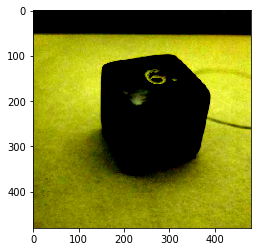

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


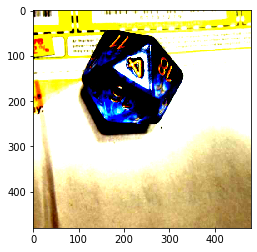

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


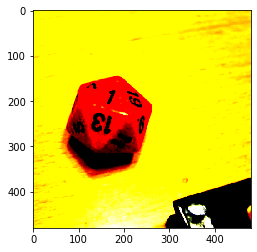

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


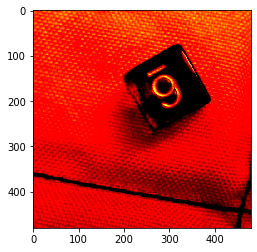

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


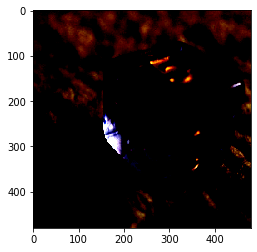

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


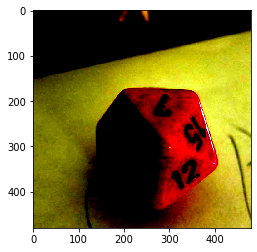

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


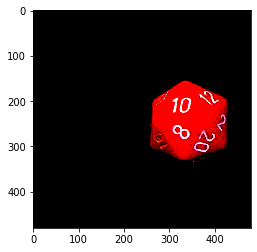

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


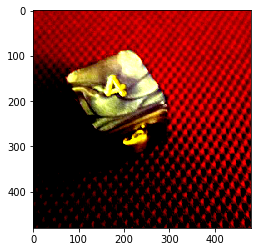

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


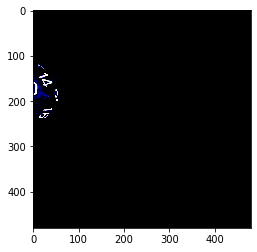

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


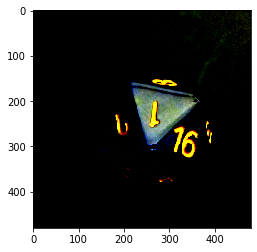

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


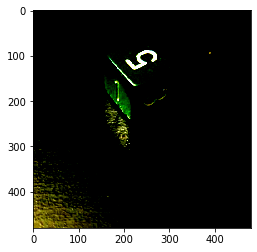

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


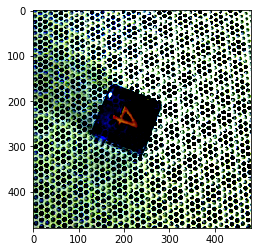

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


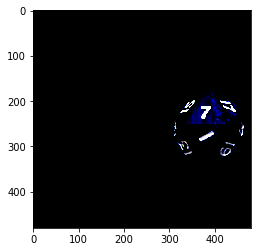

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d20


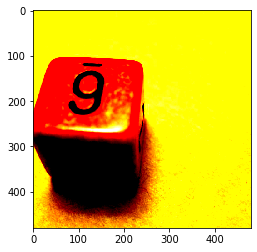

d6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


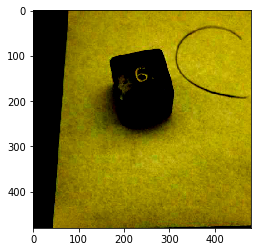

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


d6


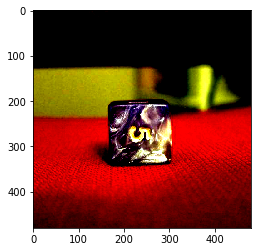

d6


In [72]:
for batch, (images, targets) in enumerate(test_loader, 0):
    show_batch(images, targets)
    break

In [64]:
test_confusion = get_confusion_matrix(model24, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 16.22%
Recall for d6 : 0.00%
Precision for d20: 54.55%
Precision for d6 : nan%
F1 for d20: 0.250000
F1 for d6 : nan


In [69]:
test_confusion = get_confusion_matrix(model24, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 8.11%
Recall for d6 : 0.00%
Precision for d20: 42.86%
Precision for d6 : nan%
F1 for d20: 0.136364
F1 for d6 : nan


In [74]:
test_confusion = get_confusion_matrix(model24, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 0.00%
Recall for d6 : 0.00%
Precision for d20: nan%
Precision for d6 : nan%
F1 for d20: nan
F1 for d6 : nan


In [63]:
test_confusion = get_confusion_matrix(model, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 8.11%
Recall for d6 : 19.23%
Precision for d20: 37.50%
Precision for d6 : 71.43%
F1 for d20: 0.133333
F1 for d6 : 0.303030


In [70]:
test_confusion = get_confusion_matrix(model, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 8.11%
Recall for d6 : 11.54%
Precision for d20: 50.00%
Precision for d6 : 33.33%
F1 for d20: 0.139535
F1 for d6 : 0.171429


In [73]:
test_confusion = get_confusion_matrix(model, test_loader)
print_f1_scores(test_confusion, test_class_from_idx)

Recall for d20: 0.00%
Recall for d6 : 0.00%
Precision for d20: nan%
Precision for d6 : nan%
F1 for d20: nan
F1 for d6 : nan
